<a href="https://colab.research.google.com/github/RUSHIMore07/rk07/blob/master/Emotion_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import *

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer

import re



In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [5]:
!kaggle datasets download -d nelgiriyewithana/emotions

emotions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip emotions.zip


Archive:  emotions.zip
replace text.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
df=pd.read_csv("text.csv")

In [8]:
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [9]:
df.shape

(416809, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [13]:
df.rename(columns={'text':"Text","label":'Label'},inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
# Create a dictionary to store unique labels and their corresponding texts
unique_labels_texts = {}

# Create a dictionary to keep track of counts of each label
label_counts = {}

# Iterate through the DataFrame
for index, row in df.iterrows():
    label = row['Label']
    text = row['Text']

    # If label is not already in the dictionary, initialize it
    if label not in unique_labels_texts:
        unique_labels_texts[label] = []
        label_counts[label] = 0

    # Check if we have collected less than 5 occurrences for this label
    if label_counts[label] < 5:
        unique_labels_texts[label].append(text)
        label_counts[label] += 1

# Print unique labels and their corresponding texts
for label, texts in unique_labels_texts.items():
    print("Label:", label)
    print("First 5 texts:")
    for text in texts:
        print(text)
    print("\n")

Label: 4
First 5 texts:
i just feel really helpless and heavy hearted
i gave up my internship with the dmrg and am feeling distraught
i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative
i dunno i just feel scared to walk in after awhile it got ok but when i walk into this room w poorly erected brick walls separating the room into xm partitions
i feel a bit intimidated and out of my league due to his experience


Label: 0
First 5 texts:
ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing
i dont know i feel so lost
i was beginning to feel quite disheartened
i can still lose the weight without feeling deprived
im feeling a little like a dama

In [15]:
'''
Label: 4
First 5 texts:
i just feel really helpless and heavy hearted
i gave up my internship with the dmrg and am feeling distraught
i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative
i dunno i just feel scared to walk in after awhile it got ok but when i walk into this room w poorly erected brick walls separating the room into xm partitions
i feel a bit intimidated and out of my league due to his experience


Label: 0
First 5 texts:
ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing
i dont know i feel so lost
i was beginning to feel quite disheartened
i can still lose the weight without feeling deprived
im feeling a little like a damaged tree and that my roots are a little out of wack


Label: 2
First 5 texts:
i would think that whomever would be lucky enough to stay in this suite must feel like it is the most romantic place on earth
i guess that feeling is what im really getting all nostalgic about
i was less intelligent and could not really feel through my music was not passionate about the little things im not sure i would go for it
i think a guy can make up for lacking funds in romantic ways to make his lady feel taken care of and loved
i would want to thank them for letting my heart feel the lovely phenomenon for the first time


Label: 1
First 5 texts:
i fear that they won t ever feel that delicious excitement of christmas eve at least not in the same way i remember doing it
i try to be nice though so if you get a bitchy person on the phone or at the window feel free to have a little fit and throw your pen at her face
i have officially graduated im not feeling as ecstatic as i thought i would
i feel my portfolio demonstrates how eager i am to learn but some who know me better might call it annoyingly persistent
i may be more biased than the next because i have a dependent life to take care of and to keep safe but i feel we all need to take care of ourselves as well


Label: 5
First 5 texts:
im forever taking some time out to have a lie down because i feel weird
i was feeling really overwhelmed
i really love reading bible because i can feel the presence of the lord jesus and i feel every single word it says and also amazed on how this and that happened how jesus sacrifice just to save us from our sin and also looking back then on how he created everything in this world
im feeling a bit amazed and grateful about having landed amid such a congregation
i just sat there feeling this weird feeling and a few moments later the leader called out to wind it down so we could switch roles


Label: 3
First 5 texts:
i feel like a jerk because the library students who all claim to love scrabble cant be bothered to participate and clearly scrabble is an inappropriate choice for a group of students whose native language isnt english
i miss all the others as well that feel that i wronged them and they will soon understand that i didnt
i saunter through the airport terminals feeling that i have had an experience that renders the petty tribulations of everyday travel somehow far less significant
i need to feel dangerous and pretty so here a striking dance pick deep in vogue minutes ago
when

'''

'\nLabel: 4\nFirst 5 texts:\ni just feel really helpless and heavy hearted\ni gave up my internship with the dmrg and am feeling distraught\ni am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative\ni dunno i just feel scared to walk in after awhile it got ok but when i walk into this room w poorly erected brick walls separating the room into xm partitions\ni feel a bit intimidated and out of my league due to his experience\n\n\nLabel: 0\nFirst 5 texts:\nive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing\ni dont know i feel so lost\ni was beginning to feel quite disheartened\ni can still lose the weight without feeling deprived\nim feeling a 

In [16]:
'''
- Label 0: Sadness - The text seems to convey feelings of sadness, such as feeling lost, disheartened, and damaged.
- Label 1: Joy -  The text appears to express joy, as it talks about graduation and being ecstatic, despite some reservations.
- Label 2: Love - The text reflects themes of love, including nostalgia, passion, and gratitude.
- Label 3: Anger - The text suggests anger, particularly in the context of feeling like a jerk and missing others who feel wronged.
- Label 4 Fear - The text evokes feelings of fear, with expressions of feeling scared, intimidated, and distraught.
- Label 5: Surprise - The text conveys surprise, such as feeling amazed, weird, and grateful.
'''

'\n- Label 0: Sadness - The text seems to convey feelings of sadness, such as feeling lost, disheartened, and damaged.\n- Label 1: Joy -  The text appears to express joy, as it talks about graduation and being ecstatic, despite some reservations.\n- Label 2: Love - The text reflects themes of love, including nostalgia, passion, and gratitude.\n- Label 3: Anger - The text suggests anger, particularly in the context of feeling like a jerk and missing others who feel wronged.\n- Label 4 Fear - The text evokes feelings of fear, with expressions of feeling scared, intimidated, and distraught.\n- Label 5: Surprise - The text conveys surprise, such as feeling amazed, weird, and grateful.\n'

In [17]:
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

In [18]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear


In [19]:
#Label Count

<ipython-input-20-e48b86df9d1f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


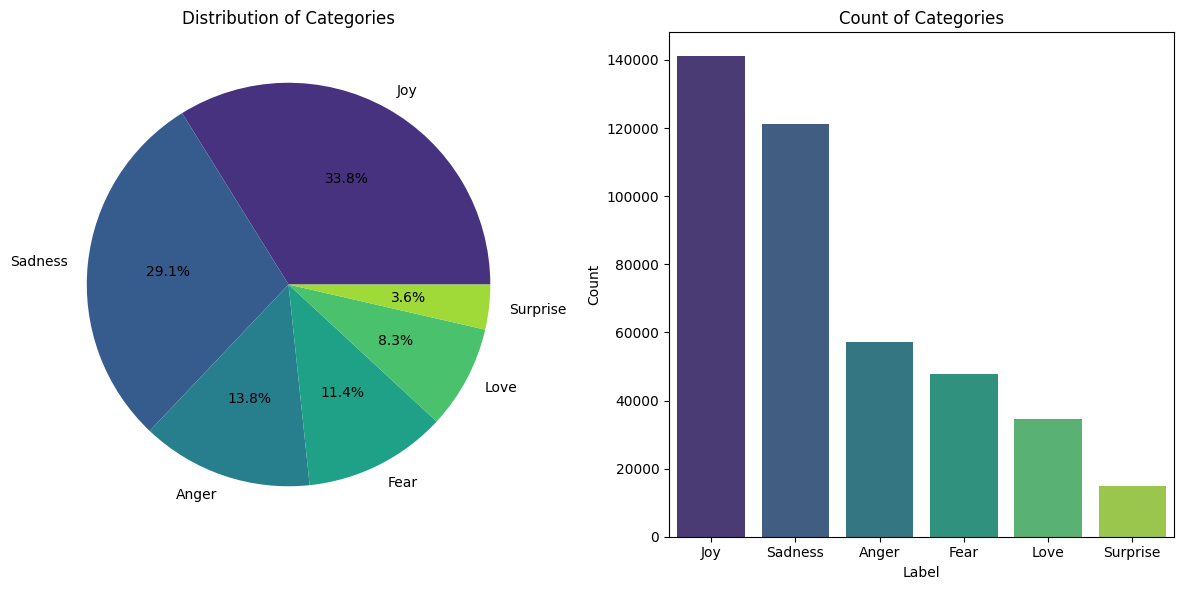

In [20]:
# Value Counts of Label
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
colors = sns.color_palette("viridis")
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=0, colors=colors)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')
axs[1].set_xlabel('Label')
axs[1].set_ylabel('Count')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
#Two Seperate Data Set for Visualizng text

# Make Seperate Data Set to Visualize text
# Sadness
df_sadness = df[df['Label']=='Sadness']
# Joy
df_joy = df[df['Label']=='Joy']
# Love
df_love = df[df['Label']=='Love']
# Anger
df_anger = df[df['Label']=='Anger']
# Fear
df_fear = df[df['Label']=='Fear']
# Surprise
df_surprise = df[df['Label']=='Surprise']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


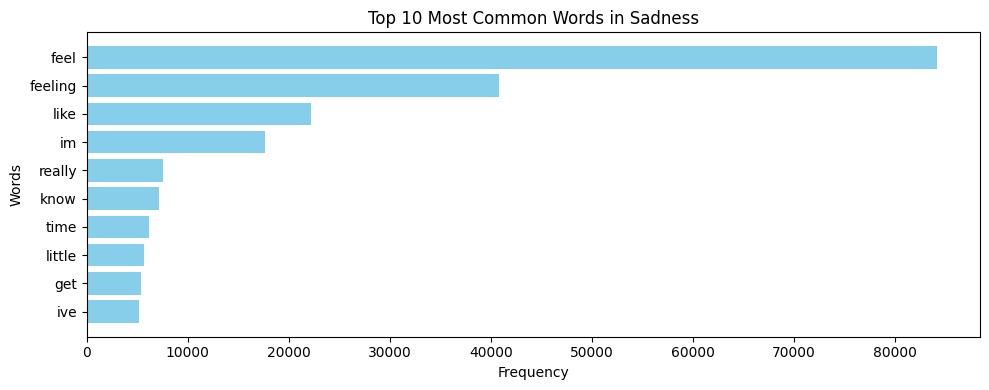

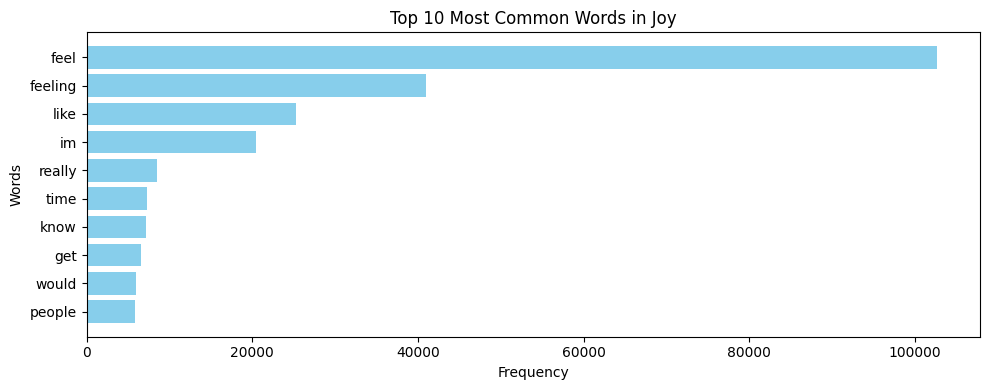

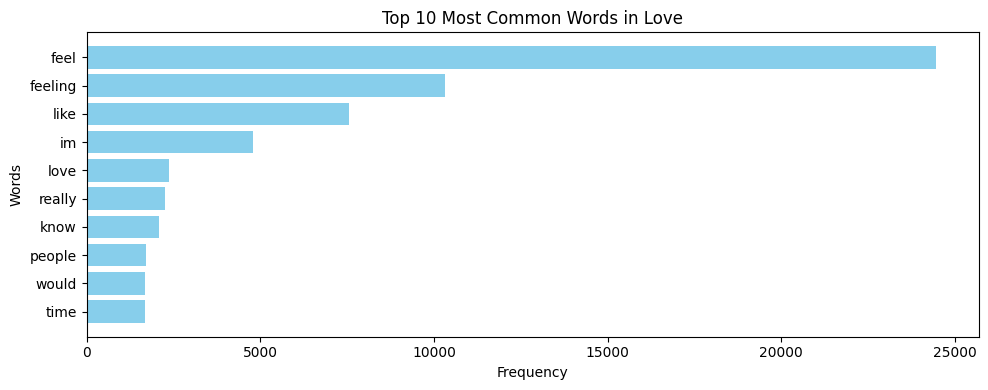

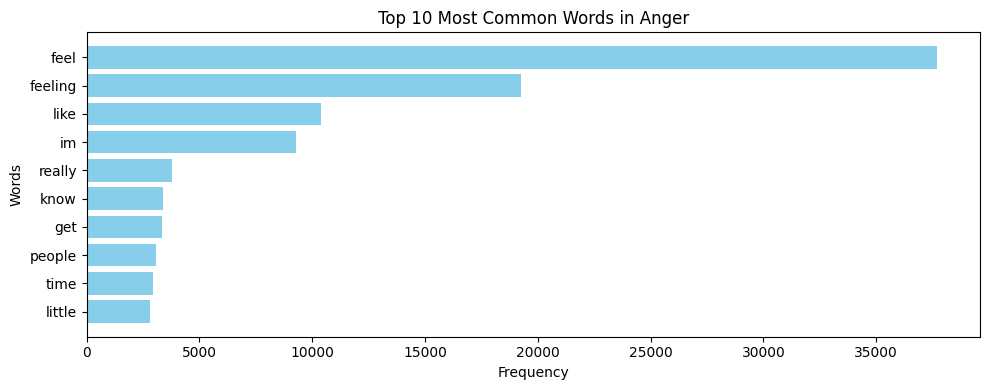

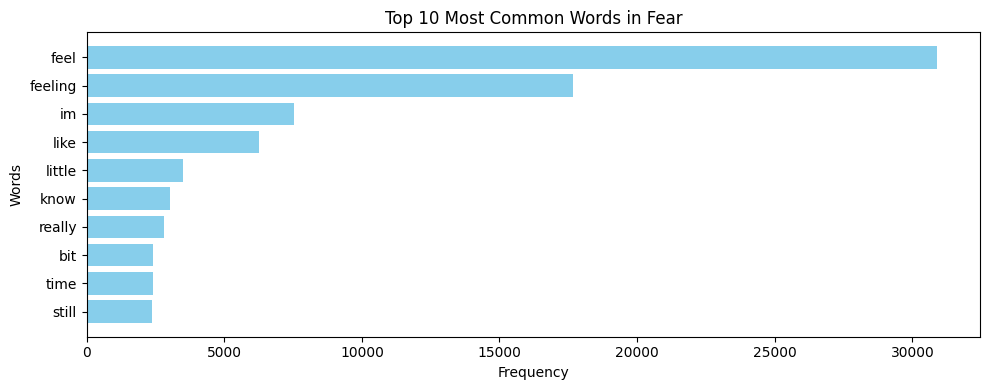

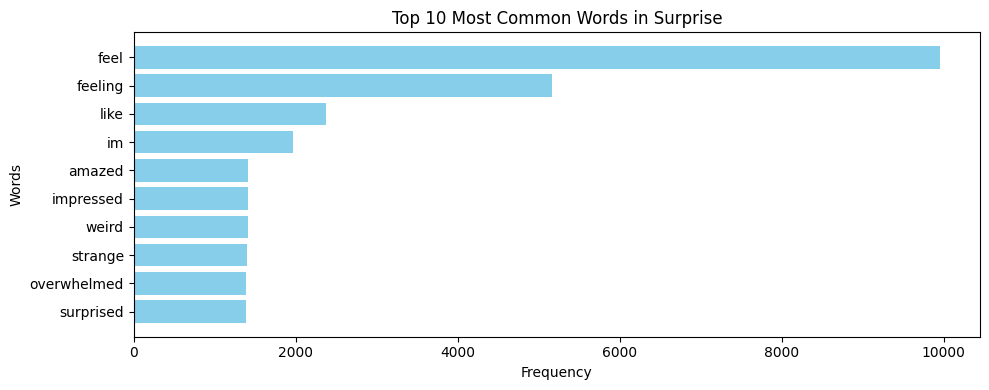

In [22]:
# Visualizing Text Using Word Cloud
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Function to remove stopwords from text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

# Function to get the most common words and their counts
def get_most_common_words(df_emotion, emotion_name, n=10):
    text = ' '.join(df_emotion['Text'])
    words = remove_stopwords(text)
    word_counts = Counter(words)
    top_words = word_counts.most_common(n)

    return top_words

# Plotting function
def plot_most_common_words(top_words, emotion_name):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 4))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top 10 Most Common Words in {emotion_name}')
    plt.gca().invert_yaxis()  # Invert y-axis to display the most common words on top
    plt.tight_layout()
    plt.show()

# Get and plot most common words for each emotion category
emotions = {'Sadness': df_sadness, 'Joy': df_joy, 'Love': df_love, 'Anger': df_anger, 'Fear': df_fear, 'Surprise': df_surprise}
for emotion_name, df_emotion in emotions.items():
    top_words = get_most_common_words(df_emotion, emotion_name)
    plot_most_common_words(top_words, emotion_name)

In [23]:
# Encode Label Again
# Now Unrename Label again
df['Label'] = df['Label'].replace('Sadness',0)
df['Label'] = df['Label'].replace('Joy',1)
df['Label'] = df['Label'].replace('Love',2)
df['Label'] = df['Label'].replace('Anger',3)
df['Label'] = df['Label'].replace('Fear',4)
df['Label'] = df['Label'].replace('Surprise',5)

In [24]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [25]:
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Step 1: Remove URLs
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [27]:
# Step 2: Remove special characters and punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [28]:
# Step 3: Remove extra whitespaces
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [29]:
# Remove Numeric Values in Textabs
# Step 4 :Remove numeric values
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)

# Head
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [30]:
#Lower Casing text
# Step 5: Lowercasing
df['Text'] = df['Text'].str.lower()

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [31]:
#Step 6: Remove Stopwords
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


In [32]:
#Remove Non-alpha Numeric
# Step 7 :  Remove non-alphanumeric characters from the 'Text' column
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


In [33]:
#Train Test Split
X = df['Text']
y = df['Label']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (333447,)
X_test shape: (83362,)
y_train shape: (333447,)
y_test shape: (83362,)


In [34]:
'''
# Tokenization and Padding Sequences
Tokenization: The text data in X_train and X_test is tokenized using the Tokenizer class from Keras. This step converts
the text data into sequences of integers, where each unique word in the dataset is assigned a unique integer index.
The num_words parameter limits the vocabulary size to 50,000 most frequent words.

Padding: After tokenization, the sequences in X_train and X_test are padded to ensure uniform length.
 This is achieved using the pad_sequences function, which pads sequences with zeros to make them all of the same
 length (maxlen). Padding is done after the sequences to ensure that the actual content of the text is preserved.

Overall, the code prepares the text data for further processing and modeling by converting it into tokenized and
padded sequences, making it suitable for use in machine learning algorithms such as neural networks.
'''

'\n# Tokenization and Padding Sequences\nTokenization: The text data in X_train and X_test is tokenized using the Tokenizer class from Keras. This step converts\nthe text data into sequences of integers, where each unique word in the dataset is assigned a unique integer index.\nThe num_words parameter limits the vocabulary size to 50,000 most frequent words.\n\nPadding: After tokenization, the sequences in X_train and X_test are padded to ensure uniform length.\n This is achieved using the pad_sequences function, which pads sequences with zeros to make them all of the same\n length (maxlen). Padding is done after the sequences to ensure that the actual content of the text is preserved.\n\nOverall, the code prepares the text data for further processing and modeling by converting it into tokenized and\npadded sequences, making it suitable for use in machine learning algorithms such as neural networks.\n'

In [35]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [36]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


In [37]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[   16 30399    69 ...     0     0     0]
 [  268     5   723 ...     0     0     0]
 [    1    44   721 ...     0     0     0]
 ...
 [    1   591     0 ...     0     0     0]
 [    4    15   473 ...     0     0     0]
 [    1   147  1739 ...     0     0     0]]

X_test_padded:
[[  120    39   169 ...     0     0     0]
 [ 3033 14468   785 ...     0     0     0]
 [  188   303    48 ...     0     0     0]
 ...
 [  841   271  1955 ...     0     0     0]
 [ 1907  7254   634 ...     0     0     0]
 [   82     1   400 ...     0     0     0]]


In [38]:
# Embedding Input Size / Vocabulary Size
input_Size = np.max(X_train_padded) + 1
input_Size

50000

In [39]:
#Define the model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# Dropout
model.add(Dropout(0.5))

# Add Bidirectional LSTM layer
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
model.add(BatchNormalization())
# Add Bidirectional GRU layer
model.add(Bidirectional(GRU(64)))

# Add output layer
model.add(Dense(6, activation='softmax'))

In [40]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 50)            2500000   
                                                                 
 dropout (Dropout)           (None, 79, 50)            0         
                                                                 
 bidirectional (Bidirection  (None, 79, 240)           123840    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 79, 128)           117504    
 onal)                                                           
                                                                 
 batch_normalization (Batch  (None, 79, 128)           512       
 Normalization)                                                  
                                                        

In [41]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=1500,
                    validation_data=(X_test_padded, y_test), callbacks=[early_stopping])


Epoch 1/20
223/223 [==============================] - 67s 245ms/step - loss: 0.4676 - accuracy: 0.8187 - val_loss: 0.6405 - val_accuracy: 0.8874
Epoch 2/20
223/223 [==============================] - 44s 195ms/step - loss: 0.1158 - accuracy: 0.9354 - val_loss: 0.1290 - val_accuracy: 0.9329
Epoch 3/20
223/223 [==============================] - 43s 195ms/step - loss: 0.0973 - accuracy: 0.9401 - val_loss: 0.0955 - val_accuracy: 0.9349
Epoch 4/20
223/223 [==============================] - 43s 191ms/step - loss: 0.0915 - accuracy: 0.9420 - val_loss: 0.0955 - val_accuracy: 0.9377
Epoch 5/20
223/223 [==============================] - 42s 188ms/step - loss: 0.0884 - accuracy: 0.9430 - val_loss: 0.0955 - val_accuracy: 0.9355
Epoch 6/20
223/223 [==============================] - 42s 190ms/step - loss: 0.0862 - accuracy: 0.9435 - val_loss: 0.0967 - val_accuracy: 0.9332
Epoch 7/20
223/223 [==============================] - 42s 190ms/step - loss: 0.0850 - accuracy: 0.9439 - val_loss: 0.1005 - val_ac

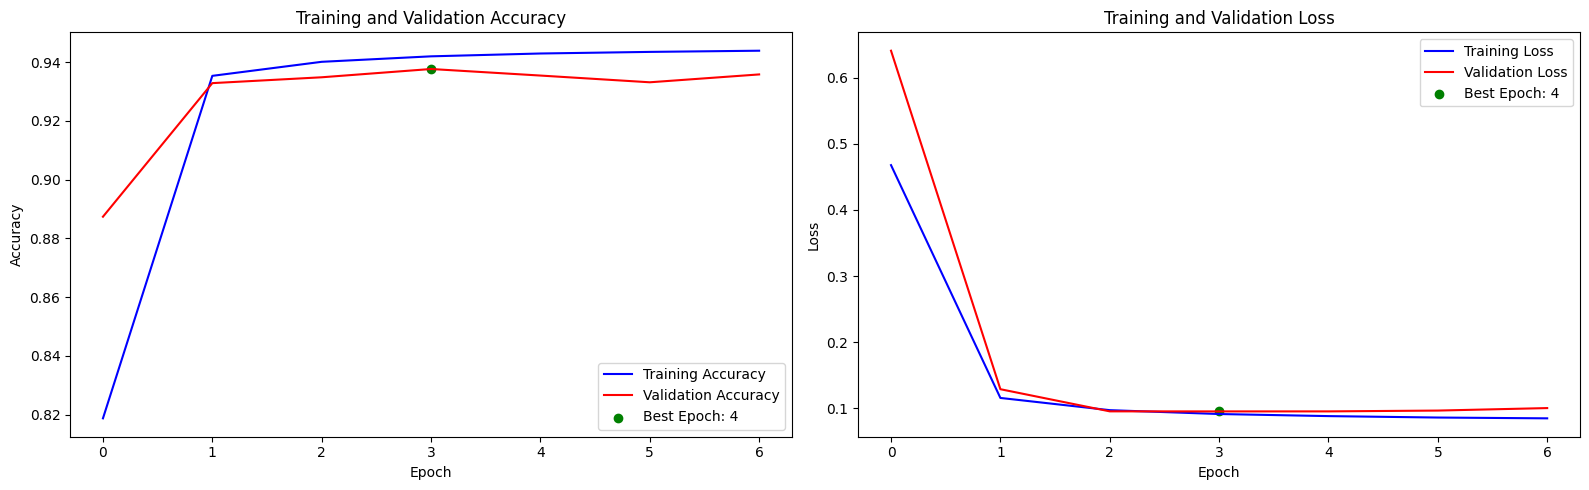

In [42]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()